# Comparing machine learning models in scikit-learn 

## Evaluation procedure #1: Train and test on the entire dataset

- Train the model on the entire dataset
- Test the model on the same dataset, and evaluate how well we did by comparing the predicted response values with the true response values 

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit (X,y)

logreg.predict(X)



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
y_pred = logreg.predict(X)
len(y_pred)

150

Classification accuracy: 
    - Proportion of correct predictions
    - Common evaluation metric for classification problems. 
    

In [4]:
from sklearn import metrics 
print metrics.accuracy_score(y,y_pred)

0.96


Known as *training accuracy* when you train and test on the same dataset.

## KNN(K=5)

In [6]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred=knn.predict(X)
print metrics.accuracy_score(y, y_pred)

0.966666666667


Problems with training and testing on the same data 
- Goal is to estimate likely performance of a model on out-of-sample data 
- But maximizing training accuracy rewards overly complex models that won't necessarily generalize 
- Unnecessary complex models overfit the training data. 


## Evaluation procedure #2: Train/test split

- Split the data into two pieces: training and testing sets
- Train the model on the training set 
- Test the model on the testing set, and evaluate how well we did. 


In [7]:
print X.shape
print y.shape

(150L, 4L)
(150L,)


In [9]:
# Step 1
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=4)

- Model can be trained and tested on different data. 
- Response values are known for the training set, and thus predictions can be evaluated
- Testing accuracy is a better estimate than training accuracy of out-of-sample performance

In [10]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(90L, 4L)
(60L, 4L)
(90L,)
(60L,)


In [11]:
# Step 2 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [12]:
# Step 3 
y_pred = logreg.predict(X_test)

print metrics.accuracy_score(y_test,y_pred)

0.95


In [13]:
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

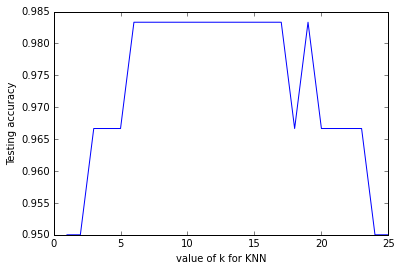

In [14]:
import matplotlib.pyplot as plt
#allow plots to appear within the notebook
%matplotlib inline 

# plot the relationship between k and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('value of k for KNN')
plt.ylabel('Testing accuracy')

- Training accuracy rises as model complexity increases
- Testing accuracy penalizes models that are too complex or not complex enough 
